In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
df = pd.read_csv('../data/cleaned/cleaned_data.csv')

In [8]:
df.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over_time                     object
percent_salary_hike            int64
relationship_satisfaction      int64
stock_option_level             int64
total_working_years            int64
training_times_last_year       int64
work_life_balance              int64
years_at_company               int64
y

### Define categorical and numerical columns

In [13]:
# Identify categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if len(df[column].unique()) < 10:  
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Create DataFrames for categorical and numerical columns
categorical = df[categorical_columns].copy()
numerical = df[numerical_columns].copy()

# Example prints to check the results
print("Categorical DataFrame:", categorical.shape)
display(categorical.head())

print("\nNumerical DataFrame:", numerical.shape)
display(numerical.head())

Categorical DataFrame: (1470, 17)


,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,Yes,1,0,0,1
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,No,4,1,3,3
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,Single,Yes,2,0,3,3
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,Yes,3,0,3,3
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,No,4,1,3,3



Numerical DataFrame: (1470, 13)


,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1102,1,94,5993,19479,8,11,8,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,2,2,2,2


In [15]:
numerical.dtypes

age                           int64
daily_rate                    int64
distance_from_home            int64
hourly_rate                   int64
monthly_income                int64
monthly_rate                  int64
num_companies_worked          int64
percent_salary_hike           int64
total_working_years           int64
years_at_company              int64
years_in_current_role         int64
years_since_last_promotion    int64
years_with_curr_manager       int64
dtype: object

In [37]:
numerical.describe()

,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


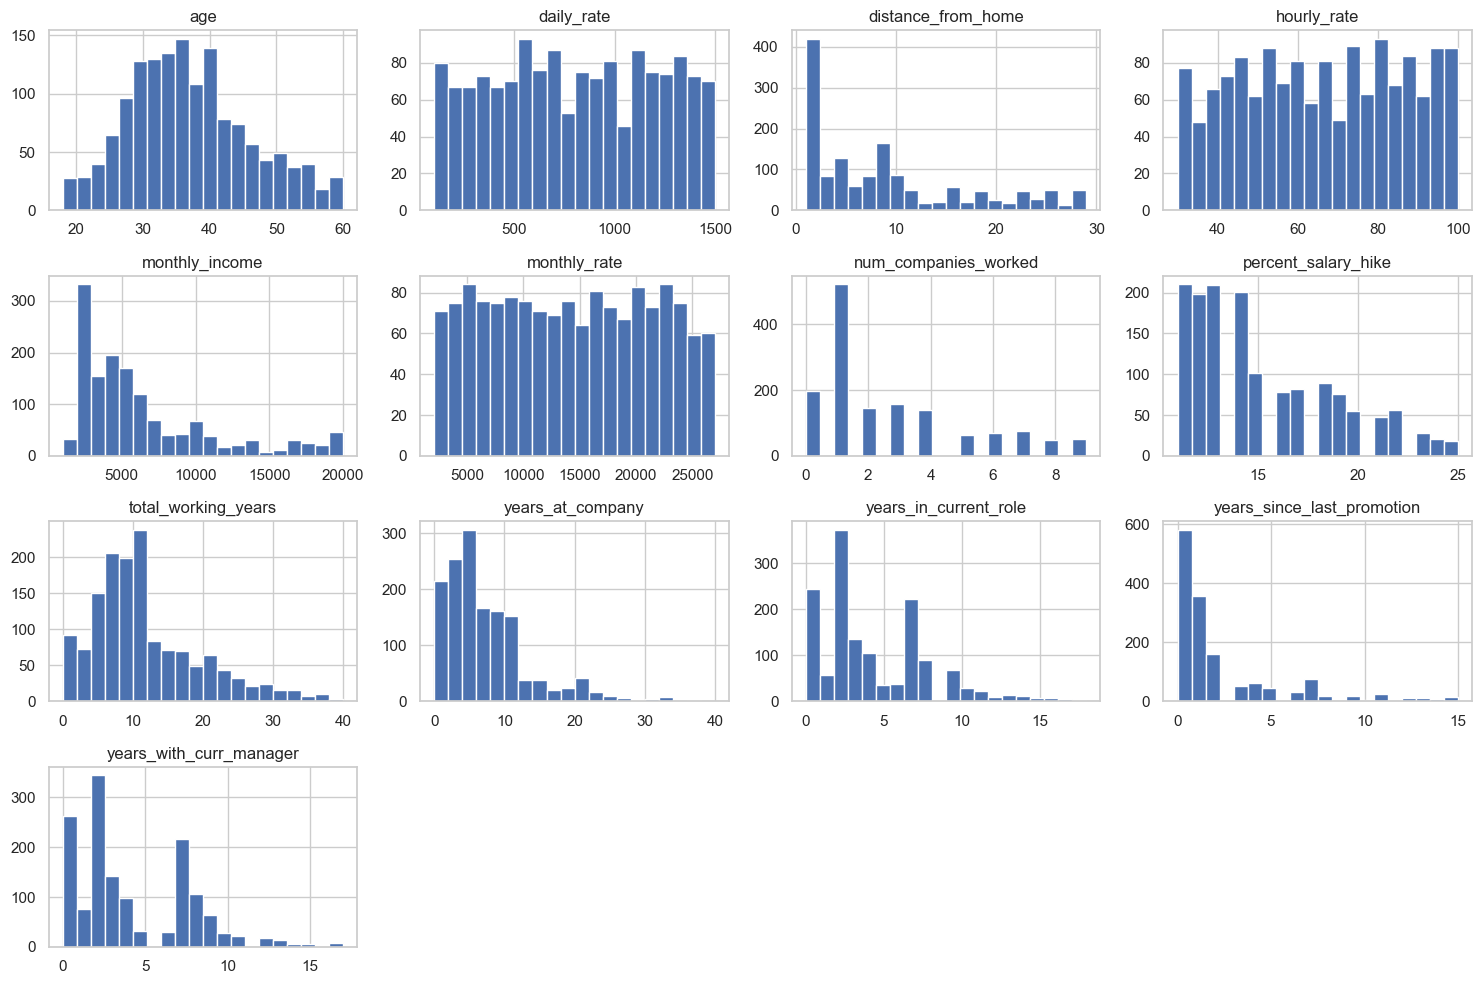

In [35]:
#Plotting the distribution of numerical columns
numerical.hist(bins=20, figsize=(15, 10))
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

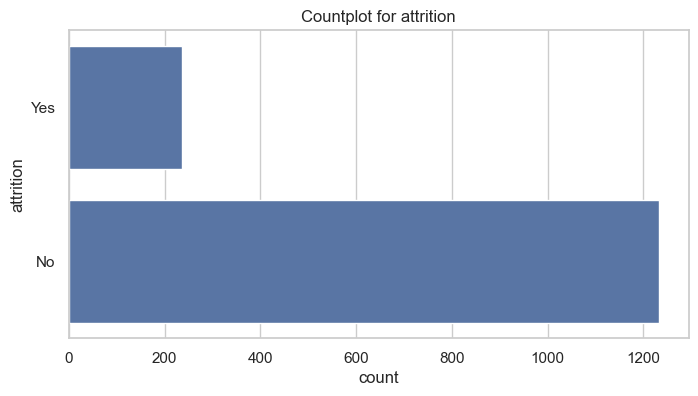

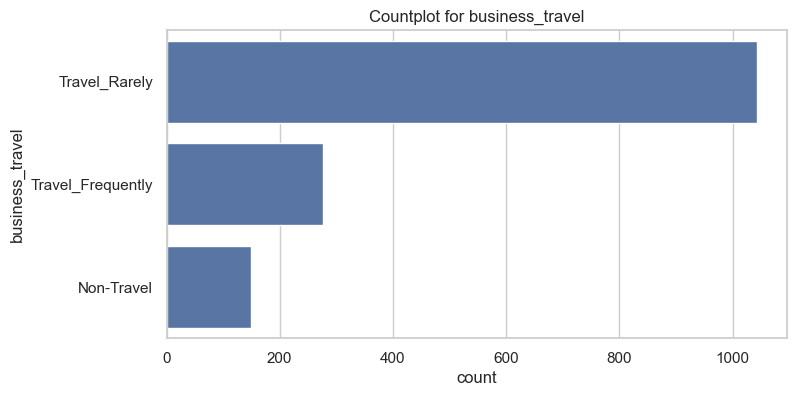

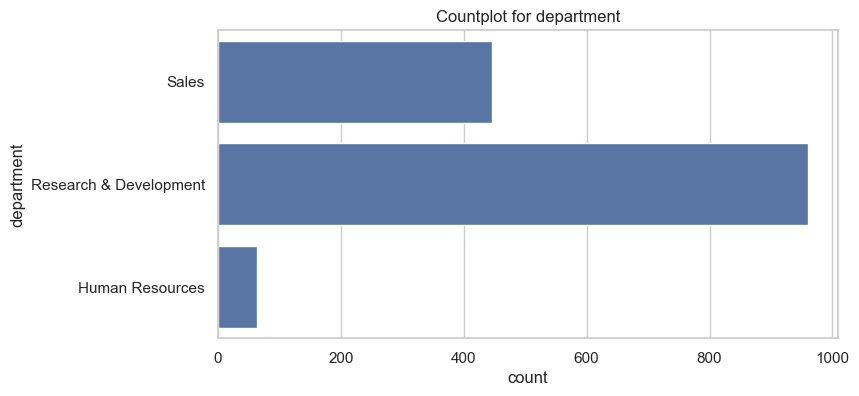

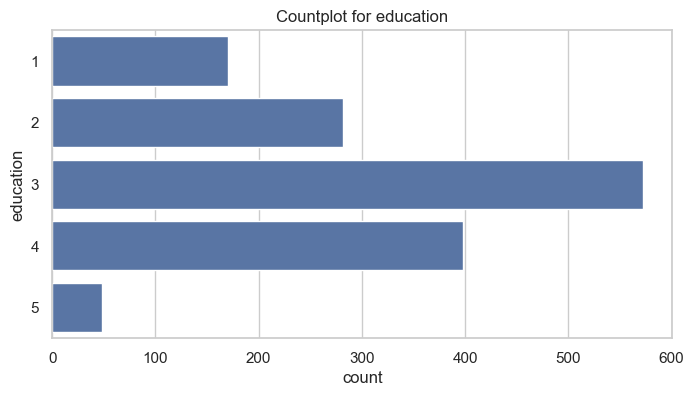

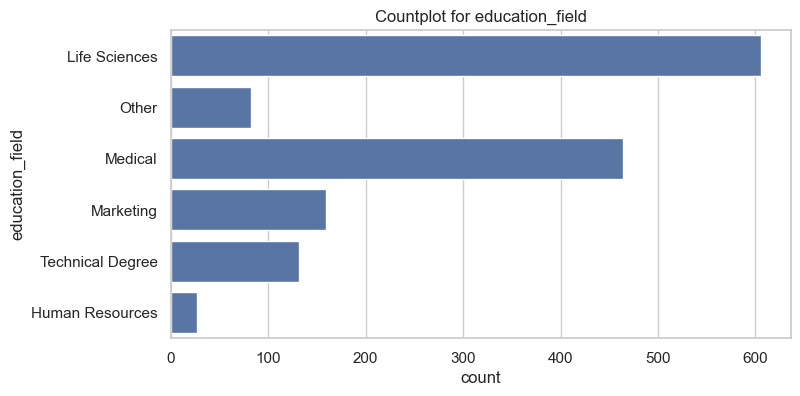

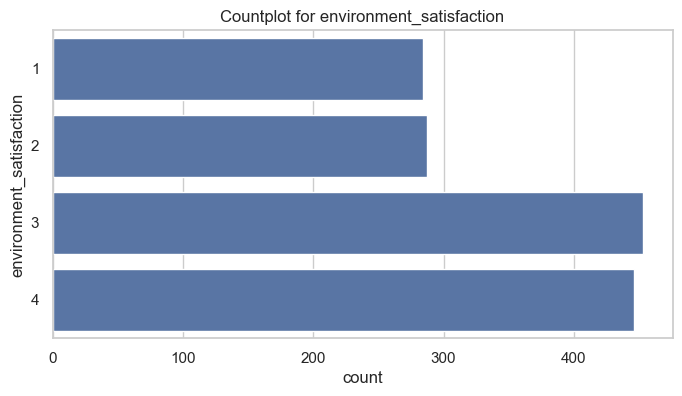

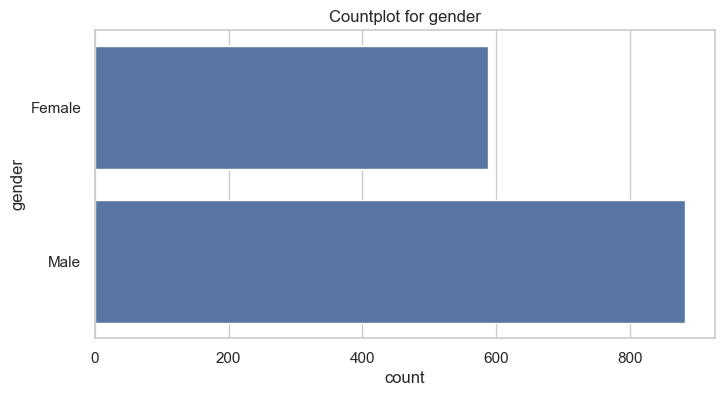

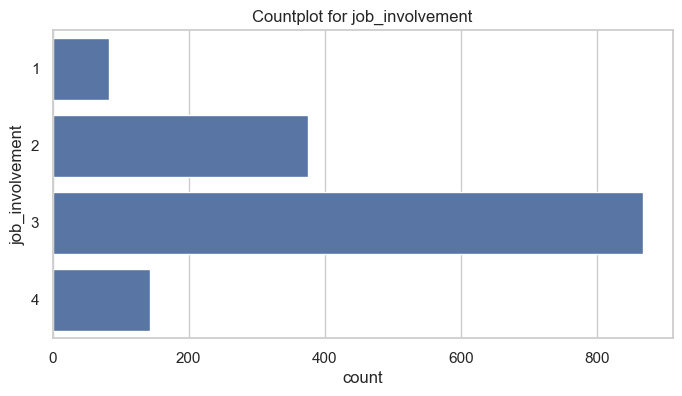

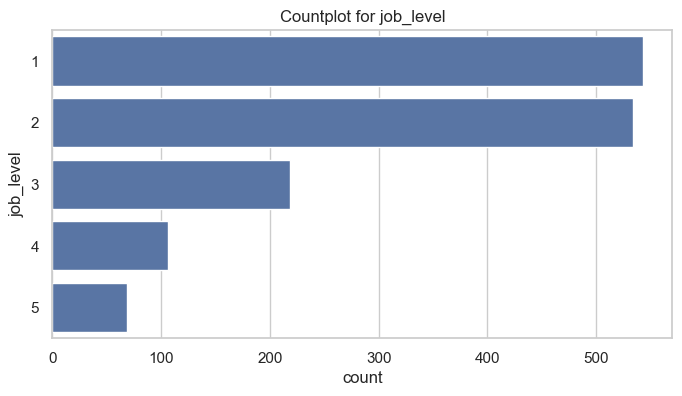

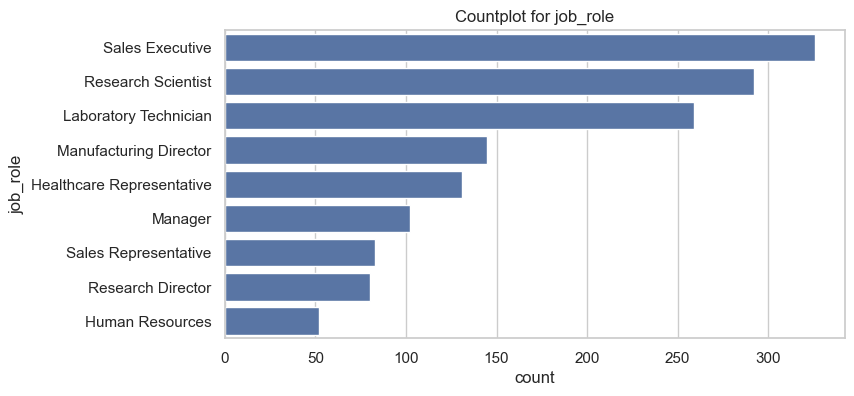

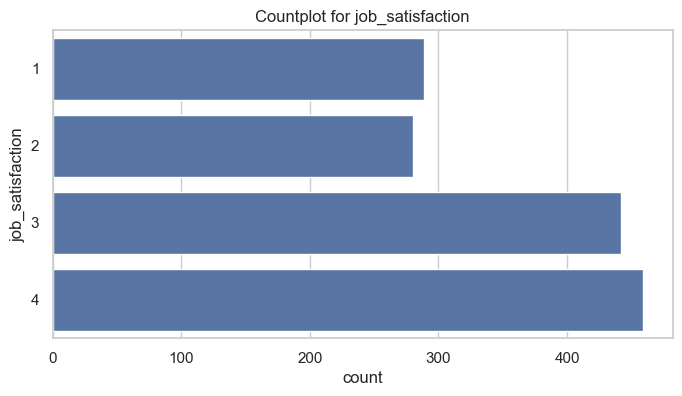

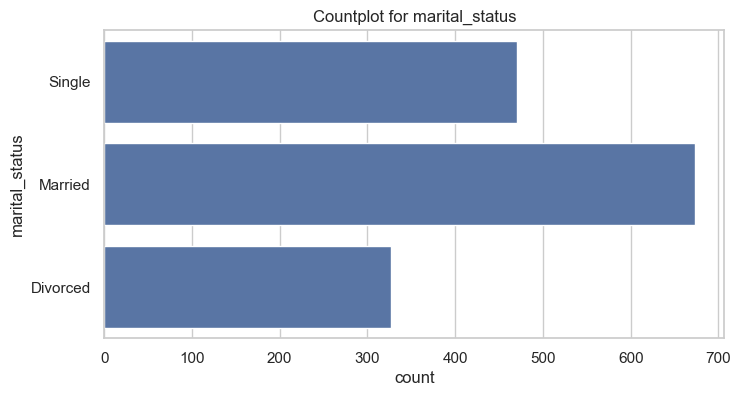

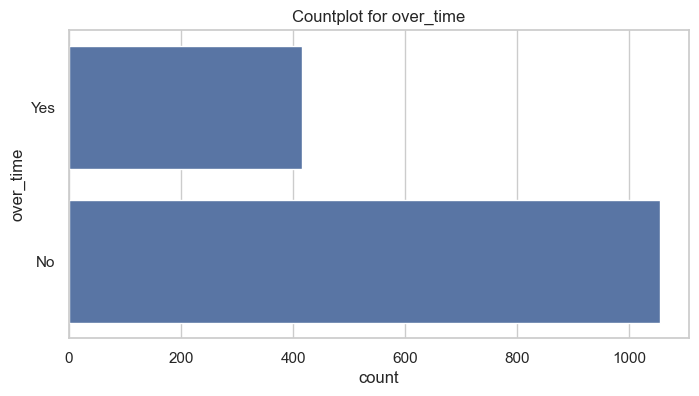

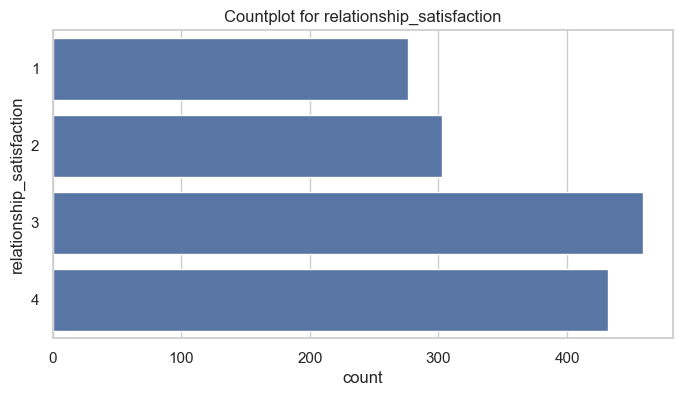

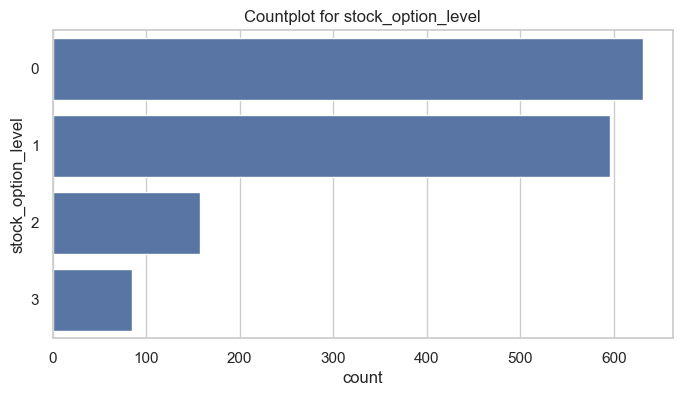

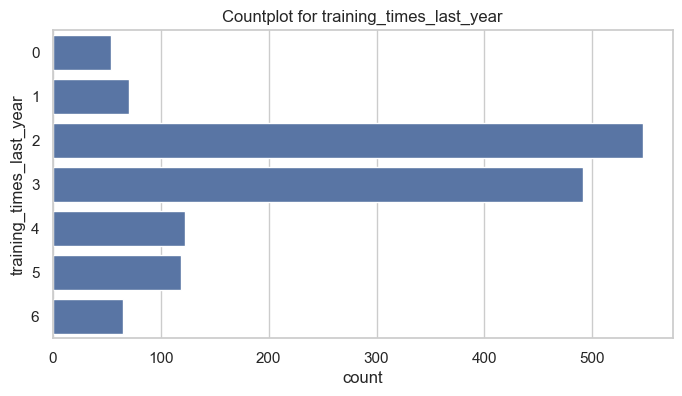

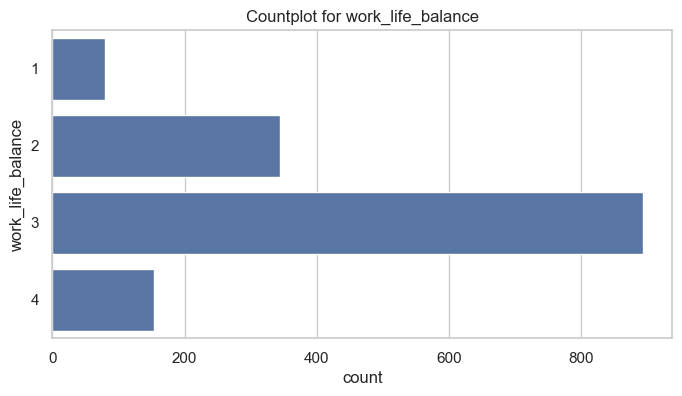

In [51]:
for column in categorical.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=column, data=categorical)
    plt.title(f'Countplot for {column}')
    plt.show()

### Balancing the target variable 'attrition' using SMOTE

In [41]:
columns_to_encode = ['business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_time']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Display the resulting DataFrame
df_encoded

,age,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single,over_time_No,over_time_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,False,False,False,True,False,False,False,True,False,True
1,49,No,279,8,1,3,61,2,2,2,...,False,False,True,False,False,False,True,False,True,False
2,37,Yes,1373,2,2,4,92,2,1,3,...,False,False,False,False,False,False,False,True,False,True
3,33,No,1392,3,4,4,56,3,1,3,...,False,False,True,False,False,False,True,False,False,True
4,27,No,591,2,1,1,40,3,1,2,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,...,False,False,False,False,False,False,True,False,True,False
1466,39,No,613,6,1,4,42,2,3,1,...,False,False,False,False,False,False,True,False,True,False
1467,27,No,155,4,3,2,87,4,2,2,...,True,False,False,False,False,False,True,False,False,True
1468,49,No,1023,2,3,4,63,2,2,2,...,False,False,False,True,False,False,True,False,True,False


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [42]:
X = df_encoded.drop('attrition', axis=1)  # Features
y = df_encoded['attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SMOTE class
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [44]:
y_train.shape

(1176,)

In [45]:
X_train.shape

(1176, 50)